In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import re
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Importing training data

data = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test1.csv')
#checking shape of the dataset
print("Data shape: {}".format(data.shape))
print("Test shape: {}".format(test.shape))

Data shape: (6454, 2)
Test shape: (1616, 2)


In [3]:
data

Sequence Label
0             CSISNIETVIE     A
1       KGFEMIWDPNGWTDTDS     A
2         GVDVSMNTHLKAVKM     A
3     VIKGGRHLIFCHSKKKCDE     A
4        AARCIDGAFRPKATDG     A
...                   ...   ...
6449           RYADEVVRTK     H
6450            KIKILEDNK     H
6451          LQHADSSNFYI     H
6452   CSLDIIADQSIFTLVVIV     H
6453           VAEADIATME     H

[6454 rows x 2 columns]

In [4]:
test

ID              Sequence
0     1001       AAAAVRPLWVRMEAA
1     1002       AAFKIAATAANSAPA
2     1003       AAFNNAIKAGTGGAY
3     1004       AAIRFFDHAIGINVP
4     1005       AAKFIIEEDSEAMEK
...    ...                   ...
1611  2612     YVRSAKLRMVTGLRNIP
1612  2613        YVSIDVTLQQLESH
1613  2614    YWTLLEPGDTIIFEANGN
1614  2615  YYQSGISVAMPVGGQSSFYS
1615  2616       YYVMSVGAKSFLVHR

[1616 rows x 2 columns]

In [5]:
#Renaming data column Label to label 
data.rename(columns = {'Label':'label'}, inplace = True)

In [6]:
# Sequence and label counts
data['label'].value_counts()
data['Sequence'].value_counts()

KIGSLDNITHVPGGGN        2
CYKKVWRDHRGTA           2
PKYVKQNTLKLAT           2
LQYMRADQAAGGLR          2
YPQPQLPYPQPQLP          2
                       ..
PVKKATVVYQGERV          1
AVTFASFDVPSKQPT         1
YNYSVIEGGPIG            1
KLTSGKPASCVDKNARGFYS    1
VAEADIATME              1
Name: Sequence, Length: 6419, dtype: int64

In [9]:
# train=data

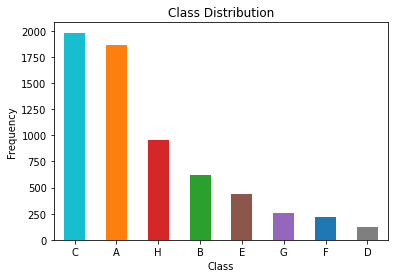

In [10]:
# plotting the Original Class Distribution to get the count of each label
# For   checking dataset is balanced or imbalanced
count_classes = pd.value_counts(data['label'], sort=True)
count_classes.plot(kind='bar', rot=0, color=['tab:cyan', 'tab:orange','tab:red', 'tab:green','tab:brown', 'tab:purple','tab:blue', 'tab:grey'])
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [11]:
train=data

In [12]:

# Y_train is our target/label column
Y_train = train['label']


# OVERSAMPLING
oversample = RandomOverSampler()
train, Y_train = oversample.fit_resample(train,Y_train)

In [13]:
train

Sequence label
0              CSISNIETVIE     A
1        KGFEMIWDPNGWTDTDS     A
2          GVDVSMNTHLKAVKM     A
3      VIKGGRHLIFCHSKKKCDE     A
4         AARCIDGAFRPKATDG     A
...                    ...   ...
15859       IGVGADKFDVNAFD     H
15860        IKFDGNAAVLLNN     H
15861             LDSYRLIA     H
15862           DAHTLYGFHN     H
15863           GHIPTVAALK     H

[15864 rows x 2 columns]

In [14]:
Y_train

0        A
1        A
2        A
3        A
4        A
        ..
15859    H
15860    H
15861    H
15862    H
15863    H
Name: label, Length: 15864, dtype: object

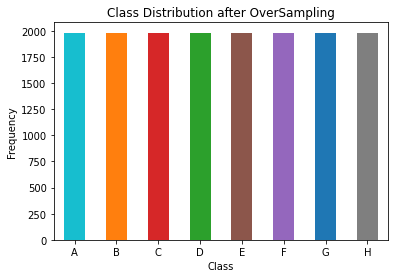

In [15]:
# plotting Sampled Class Distribution after sampling
classgraph = pd.DataFrame(Y_train)
classgraph.columns = ['Label']
count_classes = pd.value_counts(classgraph['Label'], sort=True)
count_classes.plot(kind='bar', rot=0, color=['tab:cyan', 'tab:orange','tab:red', 'tab:green','tab:brown', 'tab:purple','tab:blue', 'tab:grey'])
plt.title("Class Distribution after OverSampling")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show() 

In [16]:
# PFeatures Generation 
# List of 21 amino acids and 1 letter code 
naturalaminoAcids = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','X']

In [17]:
# Dipeptide array generation
di_peptide = []
for i in range(len(naturalaminoAcids)):
  for j in range(len(naturalaminoAcids)):
    di_peptide.append(naturalaminoAcids[i]+""+naturalaminoAcids[j])

# Computing aminoacids composition features

for naturalaminoAcid in naturalaminoAcids:
  list_column = []
  for sequence in train['Sequence']:
    num = sequence.count(naturalaminoAcid)
    den = len(sequence)
    temp = num/den
    list_column.append(temp)
  train[naturalaminoAcid]=list_column


for naturalaminoAcid in naturalaminoAcids:
  list_column = []
  for sequence in test['Sequence']:
    num = sequence.count(naturalaminoAcid)
    den = len(sequence)
    temp = num/den
    list_column.append(temp)
  test[naturalaminoAcid]=list_column





In [18]:
print(di_peptide)

['AA', 'AR', 'AN', 'AD', 'AC', 'AQ', 'AE', 'AG', 'AH', 'AI', 'AL', 'AK', 'AM', 'AF', 'AP', 'AS', 'AT', 'AW', 'AY', 'AV', 'AX', 'RA', 'RR', 'RN', 'RD', 'RC', 'RQ', 'RE', 'RG', 'RH', 'RI', 'RL', 'RK', 'RM', 'RF', 'RP', 'RS', 'RT', 'RW', 'RY', 'RV', 'RX', 'NA', 'NR', 'NN', 'ND', 'NC', 'NQ', 'NE', 'NG', 'NH', 'NI', 'NL', 'NK', 'NM', 'NF', 'NP', 'NS', 'NT', 'NW', 'NY', 'NV', 'NX', 'DA', 'DR', 'DN', 'DD', 'DC', 'DQ', 'DE', 'DG', 'DH', 'DI', 'DL', 'DK', 'DM', 'DF', 'DP', 'DS', 'DT', 'DW', 'DY', 'DV', 'DX', 'CA', 'CR', 'CN', 'CD', 'CC', 'CQ', 'CE', 'CG', 'CH', 'CI', 'CL', 'CK', 'CM', 'CF', 'CP', 'CS', 'CT', 'CW', 'CY', 'CV', 'CX', 'QA', 'QR', 'QN', 'QD', 'QC', 'QQ', 'QE', 'QG', 'QH', 'QI', 'QL', 'QK', 'QM', 'QF', 'QP', 'QS', 'QT', 'QW', 'QY', 'QV', 'QX', 'EA', 'ER', 'EN', 'ED', 'EC', 'EQ', 'EE', 'EG', 'EH', 'EI', 'EL', 'EK', 'EM', 'EF', 'EP', 'ES', 'ET', 'EW', 'EY', 'EV', 'EX', 'GA', 'GR', 'GN', 'GD', 'GC', 'GQ', 'GE', 'GG', 'GH', 'GI', 'GL', 'GK', 'GM', 'GF', 'GP', 'GS', 'GT', 'GW', 'GY', 'GV

In [19]:
print(train)

                  Sequence label         A         R         N         D  \
0              CSISNIETVIE     A  0.000000  0.000000  0.090909  0.000000   
1        KGFEMIWDPNGWTDTDS     A  0.000000  0.000000  0.058824  0.176471   
2          GVDVSMNTHLKAVKM     A  0.066667  0.000000  0.066667  0.066667   
3      VIKGGRHLIFCHSKKKCDE     A  0.000000  0.052632  0.000000  0.052632   
4         AARCIDGAFRPKATDG     A  0.250000  0.125000  0.000000  0.125000   
...                    ...   ...       ...       ...       ...       ...   
15859       IGVGADKFDVNAFD     H  0.142857  0.000000  0.071429  0.214286   
15860        IKFDGNAAVLLNN     H  0.153846  0.000000  0.230769  0.076923   
15861             LDSYRLIA     H  0.125000  0.125000  0.000000  0.125000   
15862           DAHTLYGFHN     H  0.100000  0.000000  0.100000  0.100000   
15863           GHIPTVAALK     H  0.200000  0.000000  0.000000  0.000000   

              C    Q         E         G  ...         K         M         F  \
0      0

In [20]:
# Generation of 1st order dipeptide Feature 
for dp in di_peptide:
  di_gap = []
  for sequence in train['Sequence']:
    pattern = dp[0]+'[A-Z]'+dp[1]
    if (len(sequence)-1>0):
      di_gap.append(len(re.findall(pattern,sequence))/(len(sequence)-1))
    else:
      di_gap.append(0)
  train[dp+'_a1']=di_gap

for dp in di_peptide:
  di_gap = []
  for sequence in test['Sequence']:
    pattern = dp[0]+'[A-Z]'+dp[1]
    if (len(sequence)-1>0):
      di_gap.append(len(re.findall(pattern,sequence))/(len(sequence)-1))
    else:
      di_gap.append(0)
  test[dp+'_a1']=di_gap


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [21]:
print(train)

                  Sequence label         A         R         N         D  \
0              CSISNIETVIE     A  0.000000  0.000000  0.090909  0.000000   
1        KGFEMIWDPNGWTDTDS     A  0.000000  0.000000  0.058824  0.176471   
2          GVDVSMNTHLKAVKM     A  0.066667  0.000000  0.066667  0.066667   
3      VIKGGRHLIFCHSKKKCDE     A  0.000000  0.052632  0.000000  0.052632   
4         AARCIDGAFRPKATDG     A  0.250000  0.125000  0.000000  0.125000   
...                    ...   ...       ...       ...       ...       ...   
15859       IGVGADKFDVNAFD     H  0.142857  0.000000  0.071429  0.214286   
15860        IKFDGNAAVLLNN     H  0.153846  0.000000  0.230769  0.076923   
15861             LDSYRLIA     H  0.125000  0.125000  0.000000  0.125000   
15862           DAHTLYGFHN     H  0.100000  0.000000  0.100000  0.100000   
15863           GHIPTVAALK     H  0.200000  0.000000  0.000000  0.000000   

              C    Q         E         G  ...  XK_a1  XM_a1  XF_a1  XP_a1  \
0      0.0

In [22]:
print(test)

        ID              Sequence         A         R         N         D    C  \
0     1001       AAAAVRPLWVRMEAA  0.400000  0.133333  0.000000  0.000000  0.0   
1     1002       AAFKIAATAANSAPA  0.533333  0.000000  0.066667  0.000000  0.0   
2     1003       AAFNNAIKAGTGGAY  0.333333  0.000000  0.133333  0.000000  0.0   
3     1004       AAIRFFDHAIGINVP  0.200000  0.066667  0.066667  0.066667  0.0   
4     1005       AAKFIIEEDSEAMEK  0.200000  0.000000  0.000000  0.066667  0.0   
...    ...                   ...       ...       ...       ...       ...  ...   
1611  2612     YVRSAKLRMVTGLRNIP  0.058824  0.176471  0.058824  0.000000  0.0   
1612  2613        YVSIDVTLQQLESH  0.000000  0.000000  0.000000  0.071429  0.0   
1613  2614    YWTLLEPGDTIIFEANGN  0.055556  0.000000  0.111111  0.055556  0.0   
1614  2615  YYQSGISVAMPVGGQSSFYS  0.050000  0.000000  0.000000  0.000000  0.0   
1615  2616       YYVMSVGAKSFLVHR  0.066667  0.066667  0.000000  0.000000  0.0   

             Q         E   

In [23]:
#  Dropping the Sequence and label column from train data
train = train.drop(columns=['Sequence','label'])
# Dropping the Sequence and ID column from test data
test = test.drop(columns=['Sequence','ID'])
train.isnull().sum()



A        0
R        0
N        0
D        0
C        0
        ..
XT_a1    0
XW_a1    0
XY_a1    0
XV_a1    0
XX_a1    0
Length: 462, dtype: int64

In [24]:
# train

In [25]:
# test

# **RF**

In [26]:
# from sklearn.multiclass import OneVsRestClassifier
# # Applying Random Forest
# clf = RandomForestClassifier(random_state=0,n_estimators=1000)
# clf.fit(train, Y_train)
# print(clf.score(train,Y_train))

In [27]:
# # Predict and save the output predicted labels
# predictions = clf.predict(test)
# df = pd.read_csv("test1.csv")
# df["Lable"] = predictions
# df.to_csv("FinalRF.csv", index=False)

In [28]:
# finalsol = pd.read_csv("FinalRF.csv")
# finalsol = finalsol.drop(columns=['Sequence'])
# finalsol.to_csv("FinalRF1000.csv", index=False)

# **OneVsRest RF accuracy 60.577** 

In [29]:
from sklearn.multiclass import OneVsRestClassifier
# Applying Random Forest with OneVsRestClassifier
clfovs = OneVsRestClassifier(RandomForestClassifier(random_state=0,n_estimators=1000))
clfovs.fit(train, Y_train)
print(clfovs.score(train,Y_train))

0.9988653555219364


In [30]:
predictionsovr = clfovs.predict(test)
dfovr = pd.read_csv("test1.csv")
dfovr["Lable"] = predictionsovr
dfovr=dfovr.drop(columns=['Sequence'])
dfovr.to_csv("New_OVR_RFsolution.csv", index=False)

In [33]:
# d = pd.read_csv('/content/New_OVR_RFsolution1.csv')
# d1 = pd.read_csv('/content/New_OVR_RFsolution.csv')